In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Declare a Base using automap_base()
Base = automap_base()
        
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
one_year_prior = (dt.datetime.strptime(recent_date[0],'%Y-%m-%d') - dt.timedelta(days=364)).strftime('%Y-%m-%d')
print(f'The start date for the last year is {one_year_prior}')

# Perform a query to retrieve the data and precipitation scores
date_and_precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= lastyear_startdate).all()
#date_and_precip

The start date for the last year is 2016-08-24


In [43]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_and_precip)
# date_prcp_df.head()

date_prcp_df = date_prcp_df.set_index('date')
# date_prcp_df

In [21]:
# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_index(ascending=True)

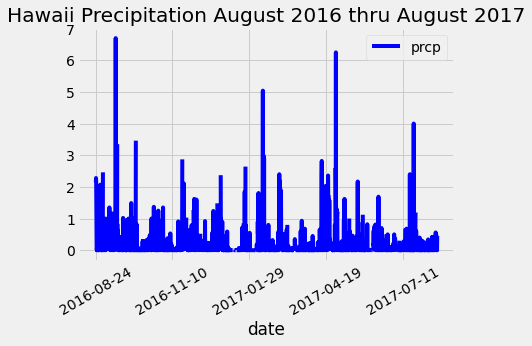

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
# date_prcp_df_sort.plot(color='blue')
date_prcp_df.plot(color='blue')
plt.title("Hawaii Precipitation August 2016 thru August 2017" )
plt.xticks(rotation=30, horizontalalignment="center")

plt.show()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number stations in the dataset
NumberStations = session.query(Station.station).count()
NumberStations

9

In [71]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order. * similar day 3 activity 3
# StationListCount = session.query(Measurement).group_by(Measurement.station).count()
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all() 
# most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# see day 3 activity 3

StationListCount = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all() 


sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

station_temps = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
station_temps

[(54.0, 85.0, 71.66378066378067)]

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station,
yearData = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()
yearData


[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [70]:
# most active station - Paige
# most_active = session.query(Measurement.station, func.count(Measurement.date)).\
#     group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).first()
# most_active

In [ ]:

# lowest = session.query(fun.min(Measurement.tobs)).filter(Measurement.station = most_active_station_id)

In [ ]:
# 12 month quer - paige
year_data = session.query(measurement.tobs).\
   filer(meausrement.date >= lastyear_start_date, measurement.sation == most_active_station_id).all()


In [65]:
# convert to DF
yearData_df = pd.DataFrame(yearData)
yearData_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 0, 'Temperature')

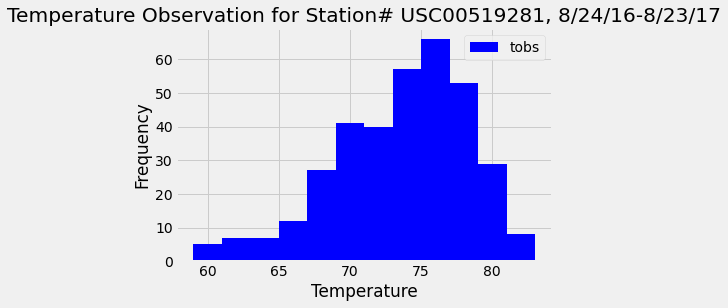

In [72]:
# create histogram using above results from 12-month query
yearData_df.plot.hist(bins=12, color='blue');
plt.title("Temperature Observation for Station# USC00519281, 8/24/16-8/23/17")
plt.xlabel("Temperature")


# Close session

In [73]:
# Close Session
session.close()